<a href="https://colab.research.google.com/github/akshayasanghavi-commits/Learningpython1/blob/main/Apex_Intelligence_The_Autonomous_Researcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Building an autonomous Resercher using Object-Oriented Programming (OOP), advanced Data Structures (Sets/Dicts), and hybrid Machine Learning (Clustering + LLMs).

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


class ResearchBase:
  def __init__(self,topic):
   self.topic=topic
   self.raw_data=[]  #  this is list empty
   self.unique_sources=set() #creating set using set constructor so round bracket

  def add_source(self, source, content):
        if source not in self.unique_sources:
            self.unique_sources.add(source)
            self.raw_data.append({"source": source, "content": content})  #adding dictiory content in list as one item

            # --- MACHINE LEARNING CONCEPT: K-Means Clustering ---
class IntelligentFilter(ResearchBase):

    def cluster_findings(self, n_clusters=2):
        # Using TF-IDF and K-Means to group similar research chunks
        #converts text into numerical vectors by scoring word importance
        vectorizer = TfidfVectorizer(stop_words='english')
        X = vectorizer.fit_transform([d['content'] for d in self.raw_data])  #identifying all the unique words (tokens) in the text corpus and building a fixed vocabulary and a mapping to numerical indices.

        model = KMeans(n_clusters=n_clusters, random_state=42) #groups similar data points together into a pre-defined number of clusters (K)
        clusters = model.fit_predict(X)

        for i, doc in enumerate(self.raw_data):
           # print(i)
           # print(clusters[i])
            doc['cluster_id'] = clusters[i]

        print(self.raw_data)
        return self.raw_data



print("✅ OOP and ML Structure Ready.")

✅ OOP and ML Structure Ready.


[{'source': 'site1.com', 'content': 'AI in healthcare is growing rapidly with surgery bots.', 'cluster_id': np.int32(0)}, {'source': 'site2.com', 'content': 'Neural networks are improving surgical precision.', 'cluster_id': np.int32(0)}, {'source': 'site3.com', 'content': 'Python remains the top language for ML in 2026.', 'cluster_id': np.int32(1)}]


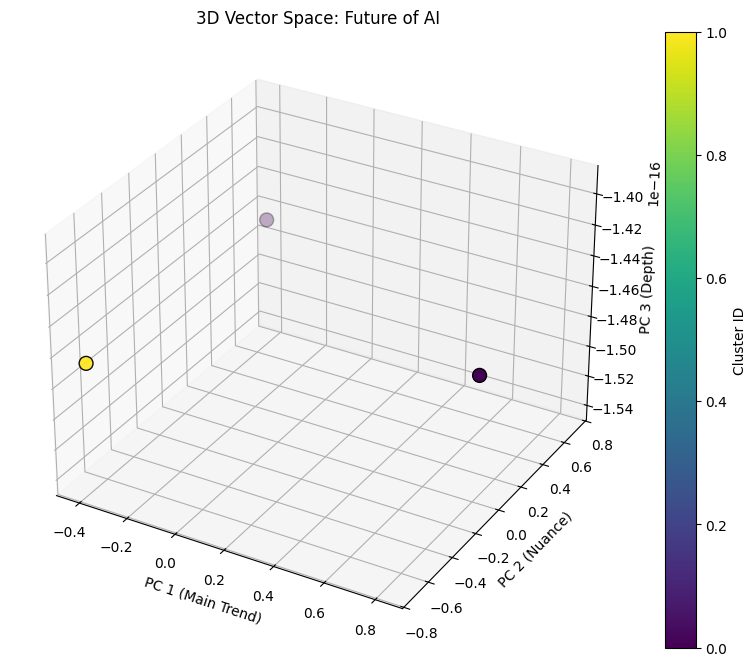

**Technical Report: Analysis of Machine Learning Trends from Clustered Data**

**Introduction:**
This report presents an analysis of recent machine learning trends, derived from a clustered dataset. The clustering algorithm identified two distinct areas of focus within the provided data, highlighting advancements in AI applications and foundational technological preferences.

---

**Cluster 0: Advancements in AI for Healthcare and Surgical Precision**

This cluster aggregates findings related to the application of Artificial Intelligence within the healthcare sector, with a particular emphasis on surgical advancements. The data indicates a significant and rapid growth trajectory for AI in healthcare.

*   **Key Findings:**
    *   **Rapid Growth of AI in Healthcare:** Artificial Intelligence is experiencing substantial and swift expansion within the healthcare domain.
    *   **Emergence of Surgery Bots:** A notable component of this growth is the increasing deployment and development 

In [4]:
#!pip install langchain_google_genai
#!pip install google-generativeai
#!pip install crewai
import os
from crewai import Agent, Task, Crew
from langchain_google_genai import ChatGoogleGenerativeAI
from google.colab import userdata
# Setup Gemini
os.environ["GOOGLE_API_KEY"] = userdata.get('GoogleKey')
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

# DATA SCIENCE TASK:
# Imagine we found these "raw" research bits via a search tool
research_pipeline = IntelligentFilter("Future of AI")


research_pipeline.add_source("site1.com", "AI in healthcare is growing rapidly with surgery bots.")
research_pipeline.add_source("site2.com", "Neural networks are improving surgical precision.")
research_pipeline.add_source("site3.com", "Python remains the top language for ML in 2026.")

# Use ML to group them
clustered_data = research_pipeline.cluster_findings(n_clusters=2)


# Now, hand the CLUSTERED data to the Agents
writer = Agent(
    role='Technical Journalist',
    goal='Write a report based on specific data clusters.',
    backstory='You are a specialist in interpreting clustered machine learning data.',
    llm=llm
)

write_task = Task(
    description=f"Analyze these ML-clustered findings and write a report: {clustered_data}",
    expected_output="A structured technical report organized by the clusters identified.",
    agent=writer
)

crew = Crew(agents=[writer], tasks=[write_task])
print(crew.kickoff())